In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# ensemble
from sklearn.ensemble import RandomForestRegressor

# Set random seed.
np.random.seed(43)

In [2]:
df = pd.read_csv('../datasets/cleaned_data.csv')

In [3]:
# df.fillna(0, inplace=True)
df.columns

Index(['Country Name', 'Country Code', 'rural_pop_percent_17',
       'food_production_index_17', 'ag_land_area_17',
       'arable_land_percent_2017', 'net_migration_2017', 'hiv_prevalence_2017',
       'mat_mortality_ratio_2017', 'under5_mortality_ratio_2017',
       'tubercul_incidence_2017', 'elec_access_2017',
       'ren_energy_percent_2017', 'co2_emissions_2017',
       'pop_air_pollution_2017', 'foreign_dir_inv_2017', 'atm_access_2017',
       'adol_fertility_rate_2017', 'fem_labor_part_rate_2017',
       'male_labor_part_rate_2017', 'fertility_rate_2017',
       'dpt_immuniz_rate_2017', 'undernourished_rate_2017',
       'cell_subscriptions_per100', 'internet_per_mil_2017',
       'military_exp_2017', 'women_seats_percent_2017', 'male_bus_start_2017',
       'female_bus_start_2017', 'patent_apps_2017', 'sci_articles_2017',
       'pop_density_2017', 'HDI'],
      dtype='object')

### Model with all columns

In [4]:
X = df.drop(columns=['Country Name', 'Country Code', 'HDI'])
y = df['HDI']

In [5]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
pd.DataFrame(lr.coef_, index = X.columns)

,0
rural_pop_percent_17,-2.908637e-03
food_production_index_17,-8.934488e-04
ag_land_area_17,-6.250351e-04
arable_land_percent_2017,2.761609e-04
net_migration_2017,-4.148560e-09
hiv_prevalence_2017,1.048085e-03
mat_mortality_ratio_2017,-5.269939e-05
under5_mortality_ratio_2017,-1.315647e-03
tubercul_incidence_2017,-5.403392e-05
elec_access_2017,1.805605e-03


In [8]:
print(f'Training R-Squared: {lr.score(X_train, y_train)}')
print(f'Test R-Squared: {lr.score(X_test, y_test)}')

Training R-Squared: 0.9408789329963084
Test R-Squared: 0.891551230280425


In [9]:
# Create the predictions for the "null model"
y_bar = np.mean(y)

# The null MSE
null_mse = np.mean((y - y_bar) ** 2)

null_mse

0.022715749606794584

In [10]:
y_preds = lr.predict(X_test)
metrics.mean_squared_error(y_test, y_preds)

0.002730613751626848

The model produces a lower MSE than the baseline. 

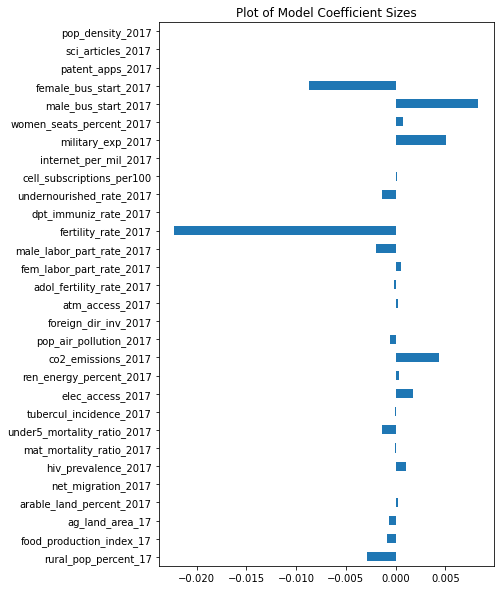

In [11]:
plot1 = pd.DataFrame(lr.coef_, index = X.columns).plot(kind = 'barh', figsize=(6,10), legend=False, title='Plot of Model Coefficient Sizes')

In [12]:
fig = plot1.get_figure()
fig.tight_layout()
fig.savefig('../images/coeff_all.png', transparent=True, bbox_inches='tight')

### Drop HIV and check

In [13]:
X = df.drop(columns=['Country Name', 'Country Code', 'hiv_prevalence_2017', 'HDI'])
y = df['HDI']

lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr.fit(X_train, y_train)

LinearRegression()

In [14]:
print(f'Training R-Squared: {lr.score(X_train, y_train)}')
print(f'Test R-Squared: {lr.score(X_test, y_test)}')

Training R-Squared: 0.9367740940871179
Test R-Squared: 0.9187857269224684


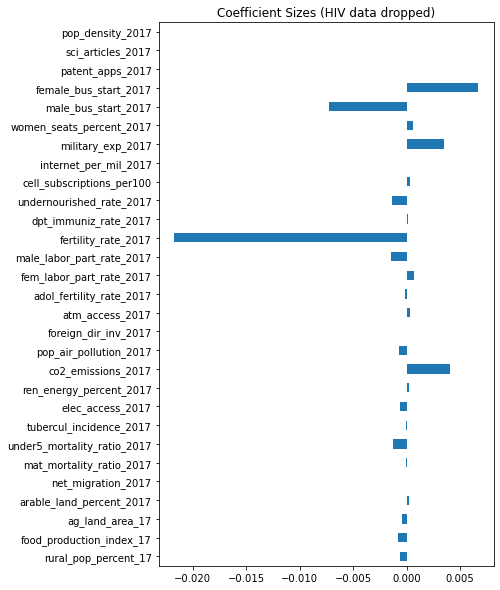

In [15]:
plot2 = pd.DataFrame(lr.coef_, index = X.columns).plot(kind = 'barh', figsize=(6,10), legend=False, title='Coefficient Sizes (HIV data dropped)');

In [16]:
fig = plot2.get_figure()
fig.tight_layout()
fig.savefig('../images/coeff_no_hiv.png', bbox_inches='tight')

-----
### Improving the linear regression model

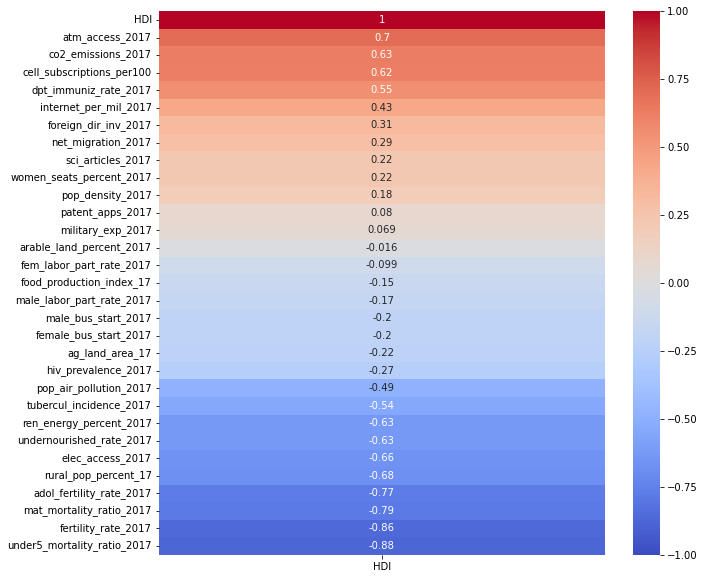

In [17]:
# distill features down
# comparing correlations of all numerical features to target 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['HDI']].sort_values(by = 'HDI', ascending=False), 
            annot=True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm'); 

In [18]:
X = df.drop(columns=['Country Name', 'Country Code', 'HDI'])
y = df['HDI']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state= 42,
                                                   test_size = 0.4) # bigger test size to better evaluate model performance

In [19]:
X_train.shape

(112, 30)

In [20]:
X_test.shape

(75, 30)

In [21]:
# Scale Features
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train) 
X_test_ss = ss.transform(X_test)

------
#### Regularization to try to reduce overfitting


Utilizing Ridge

In [22]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = alphas, cv = 5)

# Fit model using best ridge alpha!
ridge_cv.fit(X_train_ss, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [23]:
ridge_cv.best_score_

0.8848043883725119

In [24]:
print(ridge_cv.score(X_train_ss, y_train))
print(ridge_cv.score(X_test_ss, y_test))

0.9286164947416222
0.9241084228384852


----
Utilizing Lasso

In [25]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3,0,100)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas)
# Fit model using best ridge alpha!
lasso_cv.fit(X_train_ss, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [26]:
print(lasso_cv.score(X_train_ss, y_train))
print(lasso_cv.score(X_test_ss, y_test))

0.915173004599493
0.9009089431961416


In [27]:
# distilling features using Lasso
lasso_coefs = lasso_cv.coef_
lasso_coefs = pd.Series(lasso_coefs, (X.columns))
lasso_coefs

rural_pop_percent_17          -0.020856
food_production_index_17      -0.001678
ag_land_area_17               -0.000000
arable_land_percent_2017      -0.000000
net_migration_2017             0.000000
hiv_prevalence_2017            0.000000
mat_mortality_ratio_2017      -0.011057
under5_mortality_ratio_2017   -0.044806
tubercul_incidence_2017       -0.000000
elec_access_2017              -0.000000
ren_energy_percent_2017       -0.000000
co2_emissions_2017             0.015311
pop_air_pollution_2017        -0.012698
foreign_dir_inv_2017           0.001600
atm_access_2017                0.012757
adol_fertility_rate_2017      -0.000099
fem_labor_part_rate_2017       0.000000
male_labor_part_rate_2017     -0.000000
fertility_rate_2017           -0.030817
dpt_immuniz_rate_2017          0.000000
undernourished_rate_2017      -0.008597
cell_subscriptions_per100      0.008196
internet_per_mil_2017          0.006501
military_exp_2017              0.000000
women_seats_percent_2017       0.000000


In [28]:
# picking out coefficients that are not zeroed out
lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)

co2_emissions_2017             0.015311
atm_access_2017                0.012757
cell_subscriptions_per100      0.008196
internet_per_mil_2017          0.006501
foreign_dir_inv_2017           0.001600
adol_fertility_rate_2017      -0.000099
food_production_index_17      -0.001678
female_bus_start_2017         -0.004293
undernourished_rate_2017      -0.008597
mat_mortality_ratio_2017      -0.011057
pop_air_pollution_2017        -0.012698
rural_pop_percent_17          -0.020856
fertility_rate_2017           -0.030817
under5_mortality_ratio_2017   -0.044806
dtype: float64

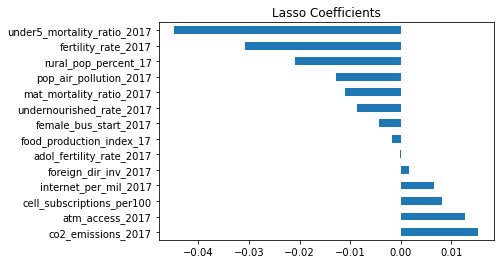

In [29]:
plot3 = lasso_coefs[lasso_coefs != 0].sort_values(ascending=False).plot.barh(title='Lasso Coefficients');

In [30]:
fig = plot3.get_figure()
fig.tight_layout()
fig.savefig('../images/lasso.png', transparent=True, bbox_inches='tight')

In [31]:
# running linear regression with select features from lasso
features = ['co2_emissions_2017','atm_access_2017', 'cell_subscriptions_per100', 'internet_per_mil_2017','foreign_dir_inv_2017','adol_fertility_rate_2017',
            'food_production_index_17', 'female_bus_start_2017', 'undernourished_rate_2017', 'mat_mortality_ratio_2017', 'pop_air_pollution_2017', 
            'rural_pop_percent_17', 'fertility_rate_2017','under5_mortality_ratio_2017']
            
X = df[features]
y = df['HDI']

In [32]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2)

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
lr.score(X_train, y_train)

0.9203660211748286

In [35]:
lr.score(X_test, y_test) # best model thus far

0.9455358370194475

In [36]:
# Create the predictions for the "null model"
y_bar = np.mean(y)

# The null MSE
null_mse = np.mean((y - y_bar) ** 2)

null_mse

0.022715749606794584

In [37]:
y_preds = lr.predict(X_test)
metrics.mean_squared_error(y_test, y_preds)

0.0013674051867873995

The model produces a lower MSE than the baseline. 

In [38]:
coef_df = pd.DataFrame(lr.coef_, index = X.columns, columns= ['Coefficient'])

In [39]:
coef_df['Coefficient'] = round(coef_df['Coefficient'], 6)

In [40]:
coef_df = coef_df['Coefficient'].sort_values(ascending = False)
coef_df # Displaying how each coefficient impacts the target HDI index

co2_emissions_2017             0.003587
atm_access_2017                0.000326
cell_subscriptions_per100      0.000185
internet_per_mil_2017          0.000001
foreign_dir_inv_2017           0.000000
mat_mortality_ratio_2017      -0.000048
adol_fertility_rate_2017      -0.000185
female_bus_start_2017         -0.000366
pop_air_pollution_2017        -0.000946
food_production_index_17      -0.000991
under5_mortality_ratio_2017   -0.001020
rural_pop_percent_17          -0.001213
undernourished_rate_2017      -0.001779
fertility_rate_2017           -0.025241
Name: Coefficient, dtype: float64

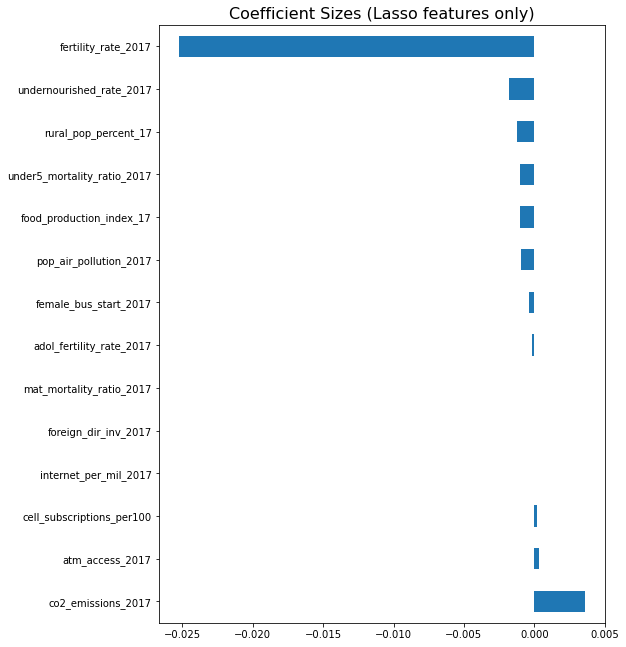

In [41]:
lr_coefs = lr.coef_
lr_coefs = pd.Series(lr_coefs, (X.columns))
plot4 = lr_coefs.sort_values(ascending = False).plot.barh(figsize=(8,11))

plt.title('Coefficient Sizes (Lasso features only)', fontsize = 16);

In [42]:
fig = plot4.get_figure()
fig.tight_layout()
fig.savefig('../images/coeff_lasso.png', transparent=True, bbox_inches='tight')

-----
### Checking Line Assumptions for inference

In [43]:
residuals = y_test - y_preds

In [44]:
# L - Linearity: relationship between x and y should be linear

In [45]:
# I assumption: true by assumption

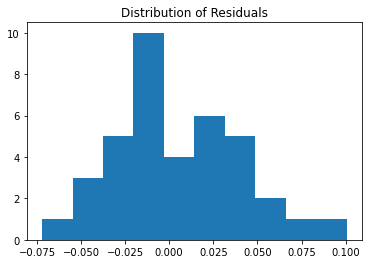

In [62]:
# Normality assumption 

plt.figure()
plt.title('Distribution of Residuals')
plt.hist(residuals, bins = 10);
plt.savefig('../images/res_dist.png', transparent=True, bbox_inches='tight')
plt.show()

In [63]:
#plt.tight_layout()
#plt.savefig('../images/res_dist.png', transparent=True, bbox_inches='tight')

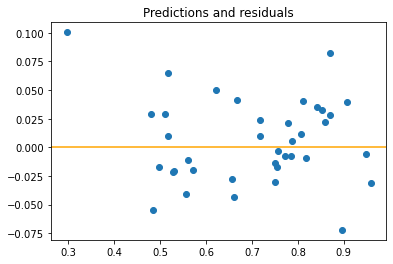

In [64]:
# E - Equal variances (of residuals - AKA Homoscedasticity)
# Let's plot our residuals - check the L and E assumptions
plt.figure()
plt.scatter(y_preds, residuals)
plt.title('Predictions and residuals')
plt.axhline(0, color = 'orange');
plt.savefig('../images/res_var.png', transparent=True, bbox_inches='tight')
plt.show()

In [59]:
#plt.tight_layout()
#plt.savefig('../images/res_var', transparent=True, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>